# ROC 곡선과 AUC
- ROC 곡선: FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선

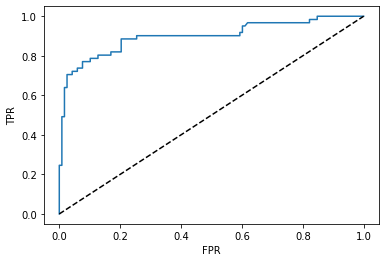

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # PassengerId, Name, Ticket 은 생존율에 영향이 없을 것이라 판단
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
    
titanic_df = pd.read_csv(r'C:\Users\arceu\Desktop\Machine-Learning\data\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2)

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

pred_prob = clf.predict_proba(X_test)

result = np.concatenate([pred_prob, pred.reshape(-1, 1)], axis=1)

from sklearn.preprocessing import Binarizer

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
pred_prob2 = pred_prob[:, 1].reshape(-1, 1)

def roc_curve_plot(y_test, pred_prob2):
    fprs, tprs, ths = roc_curve(y_test, pred_prob2)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

roc_curve_plot(y_test, pred_prob2)